In [51]:
import pandas as pd
import seaborn as sns
from pyxlsb import open_workbook as open_xlsb
import matplotlib.pyplot as plt
import numpy as np
import scipy.stats as stats

In [6]:
# reading format file .xlsb
def read_xlsb(file_path, sheet_name):
    df_list = []
    with open_xlsb(file_path) as wb:
        with wb.get_sheet(sheet_name) as sheet:
            for row in sheet.rows():
                df_list.append([item.v for item in row])

    df = pd.DataFrame(df_list[1:], columns=df_list[0])
    df.dropna(how='all', inplace=True)  # Remove rows with all missing valuesx
    return df

In [7]:
# download data
train_data_path = "./data/Training.xlsb"
train_sheet_name = 'Training'  # Укажите имя листа, который хотите прочитать
train_data = read_xlsb(train_data_path, train_sheet_name)

test_data_path = "./data/Test.xlsb"
test_sheet_name = 'Test'  # Укажите имя листа, который хотите прочитать
test_data = read_xlsb(test_data_path, test_sheet_name)

KeyboardInterrupt: 

In [31]:
# EDA. General information
# Dataset sizes
print("Training sample size:", train_data.shape)
print("Test sample size:", test_data.shape)

# Feature Data Types
print("Feature Data Types:")
print(train_data.dtypes)

# Checking for Missing Values
print("Having missing values:")
print(train_data.isnull().sum())



Training sample size: (89734, 26)
Test sample size: (38405, 26)
Feature Data Types:
ID        float64
A         float64
B         float64
C         float64
D         float64
E         float64
F         float64
G         float64
H         float64
I          object
J         float64
K          object
L         float64
M          object
N          object
O          object
P          object
Q          object
R          object
S          object
T          object
U          object
V          object
W          object
X          object
MARKER    float64
dtype: object
Having missing values:
ID        0
A         0
B         0
C         0
D         0
E         0
F         0
G         0
H         0
I         0
J         0
K         0
L         0
M         0
N         0
O         0
P         0
Q         0
R         0
S         0
T         0
U         0
V         0
W         0
X         0
MARKER    0
dtype: int64


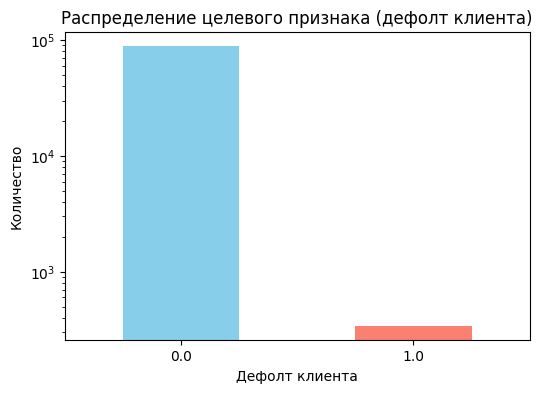

Отношение классов (дефолт / без дефолта): 0.003825845713262932


In [29]:
#EDA target feature distribution

target_distribution = train_data['MARKER'].value_counts()

# Постройте столбчатую диаграмму распределения классов
plt.figure(figsize=(6, 4))  # Размер графика (опционально)
target_distribution.plot(kind='bar', color=['skyblue', 'salmon'])
plt.xticks(rotation=0)
plt.yscale("log")
plt.title("Распределение целевого признака (дефолт клиента)")
plt.xlabel("Дефолт клиента")
plt.ylabel("Количество")
plt.show()

# Посчитайте отношение классов
class_ratio = target_distribution[1] / target_distribution[0]
print("Отношение классов (дефолт / без дефолта):", class_ratio)

Statistical indicators of numerical features:
                 ID             A             B             C             D  \
count  89734.000000  89734.000000  89734.000000  89734.000000  89734.000000   
mean   44867.500000      0.167863      0.113511     85.801266    548.507954   
std    25904.118865      0.153851      0.105340    105.366771    448.686233   
min        1.000000      0.000002      0.000001      0.000000     49.980000   
25%    22434.250000      0.065843      0.042922     20.570000    227.030000   
50%    44867.500000      0.119133      0.079733     50.020000    408.735000   
75%    67300.750000      0.220000      0.146990    108.930000    746.710000   
max    89734.000000      7.067250      0.874025   2682.420000   4999.000000   

                  E             F             G             H             J  \
count  89734.000000  89734.000000  89734.000000  89734.000000  89734.000000   
mean       1.011455      0.683640      7.854358      0.510274     41.140778   
std  

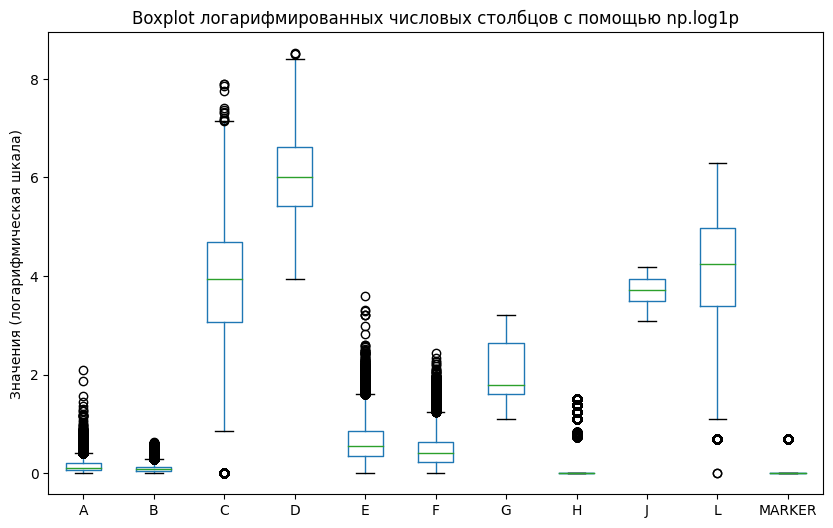

<Figure size 1200x800 with 0 Axes>

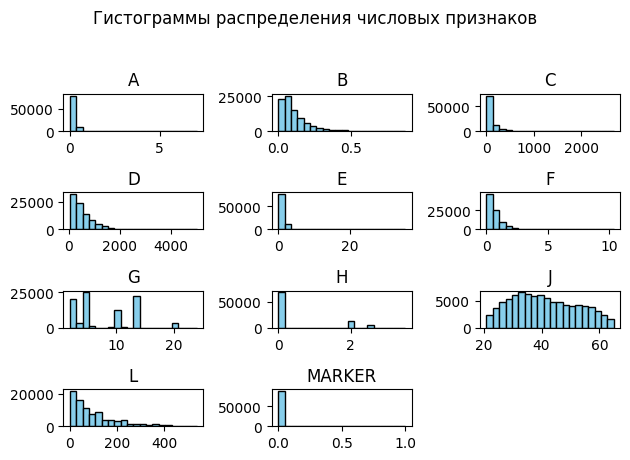

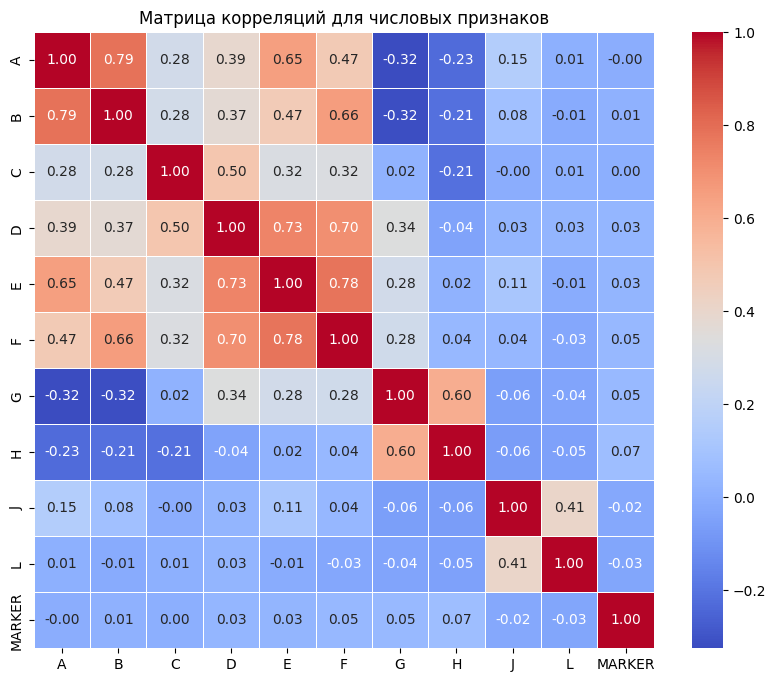

In [55]:
#EDA Analysis of numerical features
# Statistical indicators of numerical features
print("Statistical indicators of numerical features:")
numeric_stats = train_data.describe()
numeric_columns = numeric_stats.columns.drop("ID")
print(numeric_stats)

# Примените логарифмическое преобразование только к положительным значениям
train_data_log = train_data[numeric_columns].apply(lambda x: np.log1p(x))

# Постройте boxplot для логарифмированных числовых столбцов
plt.figure(figsize=(10, 6))  # Размер графика (опционально)
train_data_log.boxplot(grid=False)
plt.title("Boxplot логарифмированных числовых столбцов с помощью np.log1p")
plt.ylabel("Значения (логарифмическая шкала)")
plt.show()

# Постройте гистограммы распределения числовых признаков
plt.figure(figsize=(12, 8))  # Размер графика (опционально)
train_data[numeric_columns].hist(bins=20, color='skyblue', edgecolor='black', grid=False)
plt.suptitle("Гистограммы распределения числовых признаков")
plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()



# Вычислите матрицу корреляций для числовых признаков
correlation_matrix = train_data[numeric_columns].corr()

# Постройте тепловую карту (heatmap) для матрицы корреляций
plt.figure(figsize=(10, 8))  # Размер графика (опционально)
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title("Матрица корреляций для числовых признаков")
plt.show()


Categorical features:
Index(['I', 'K', 'M', 'N', 'O', 'P', 'Q', 'R', 'S', 'T', 'U', 'V', 'W', 'X'], dtype='object')


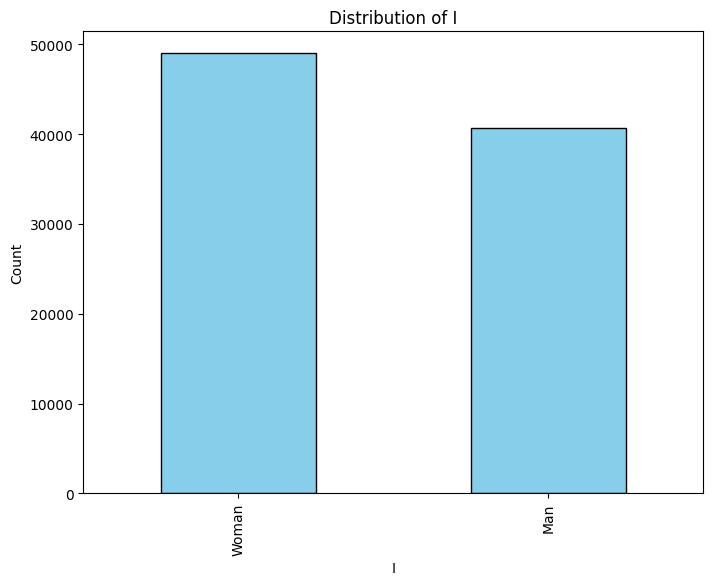

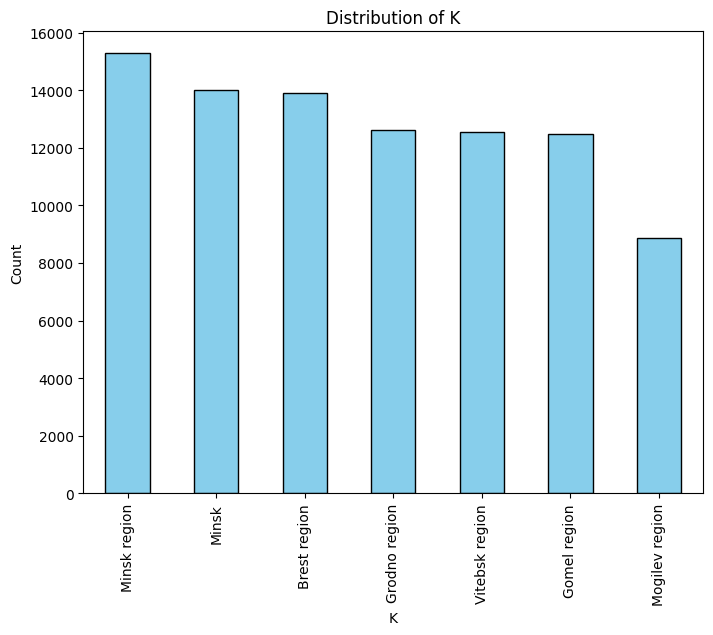

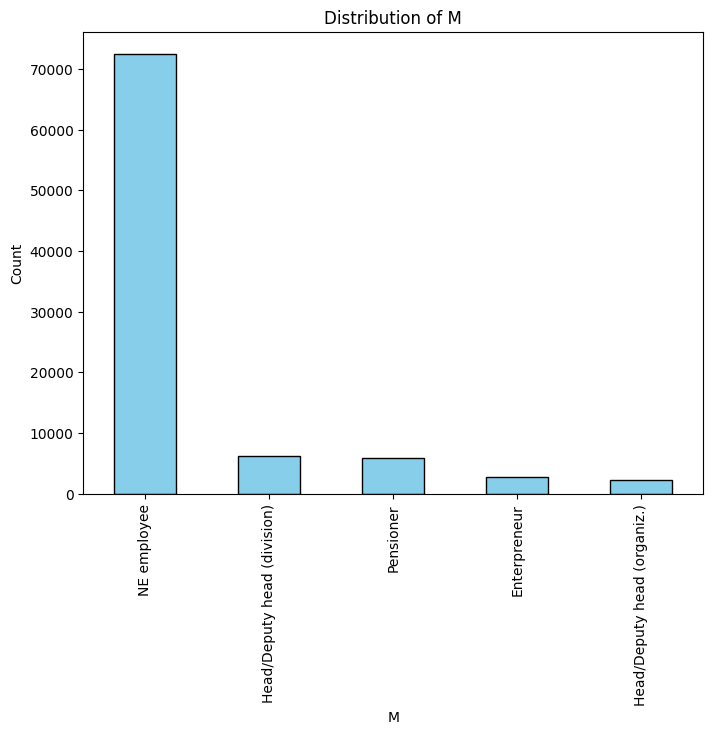

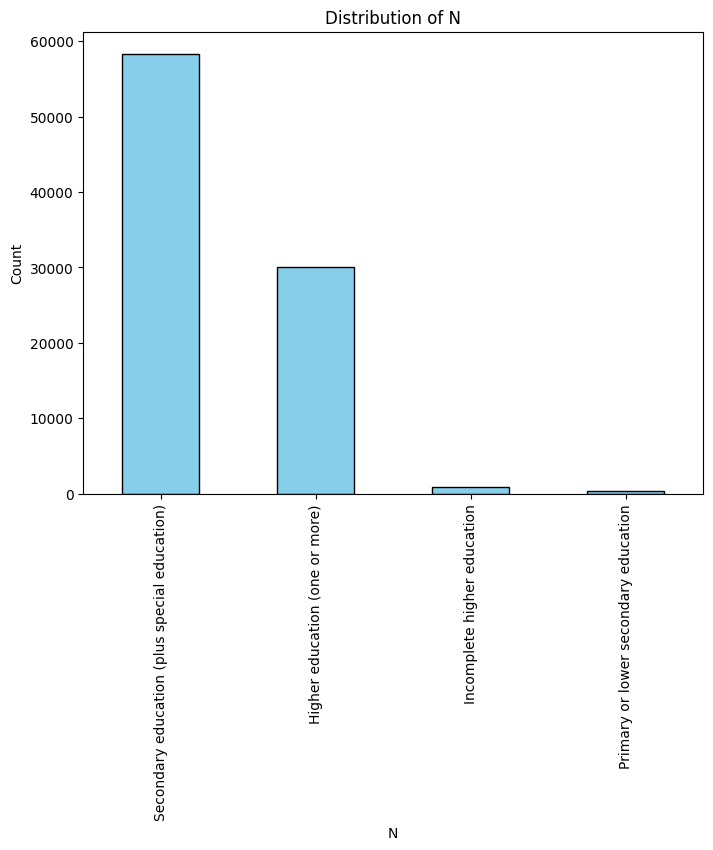

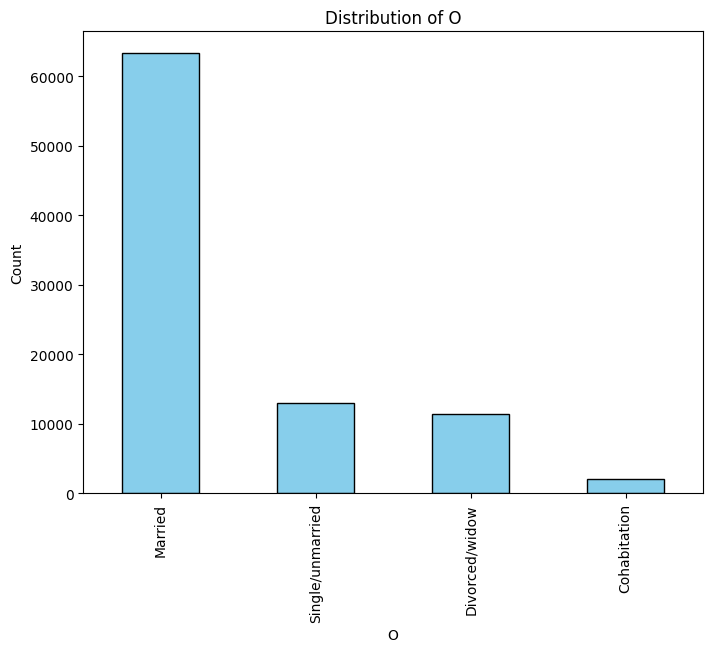

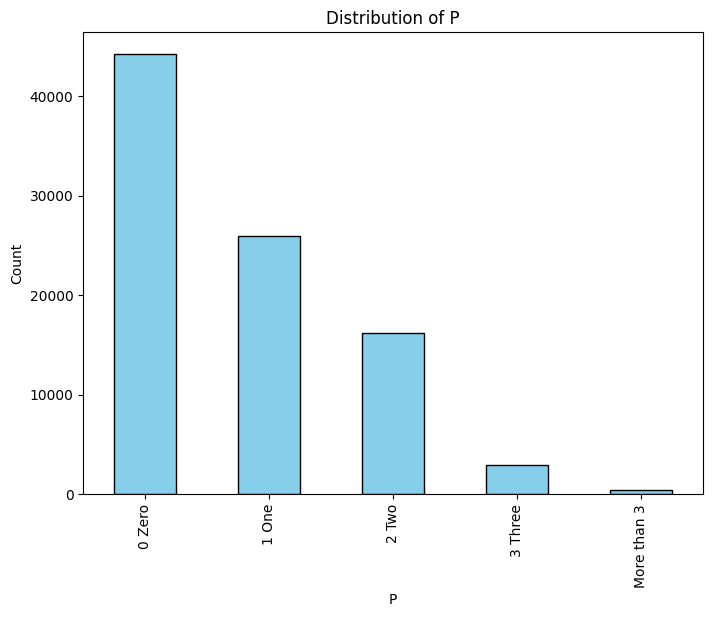

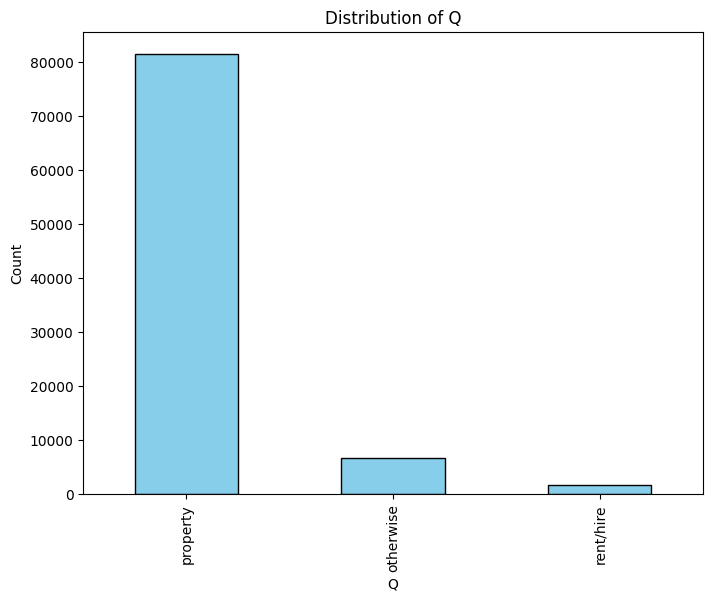

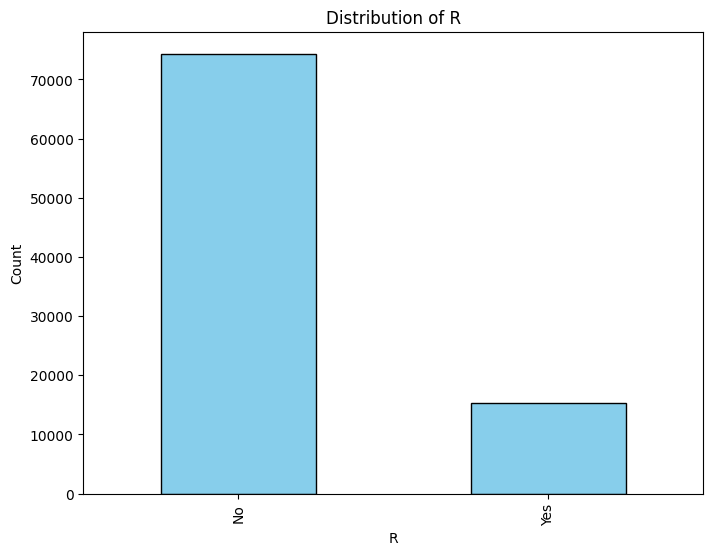

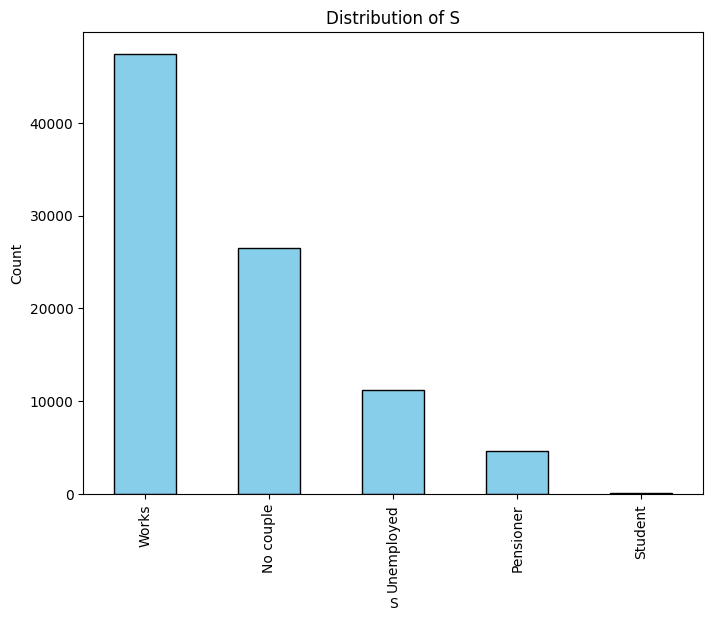

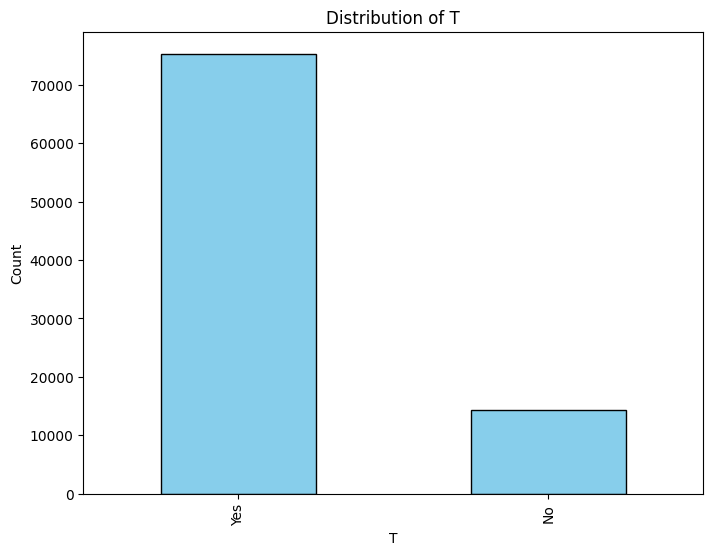

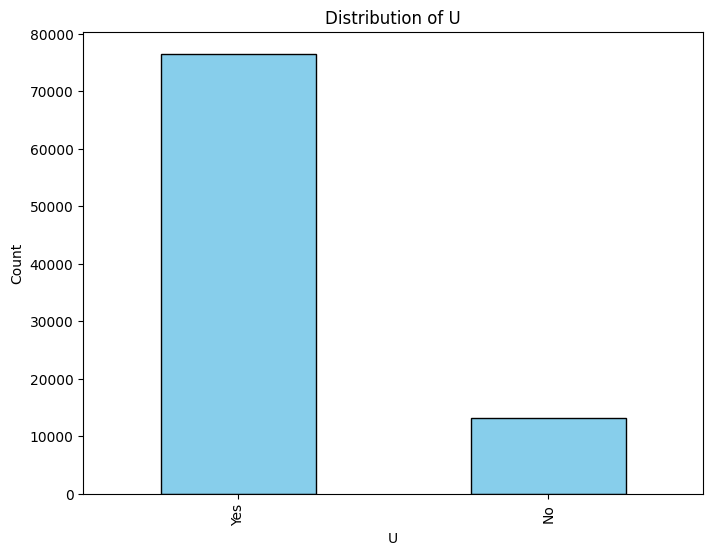

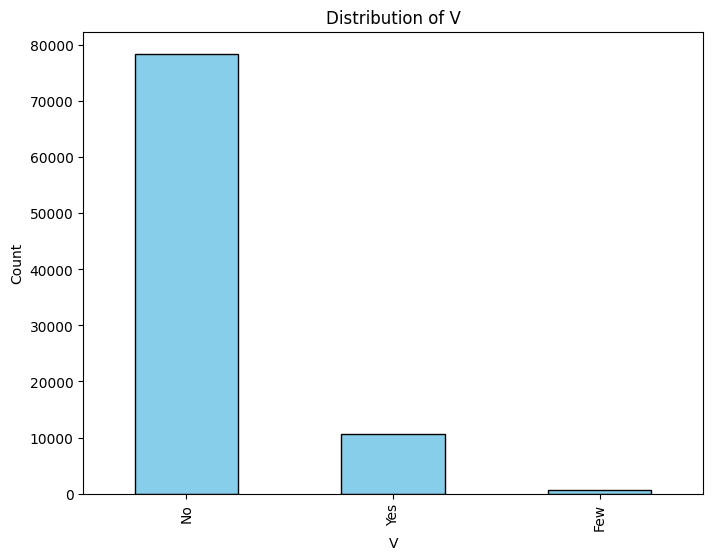

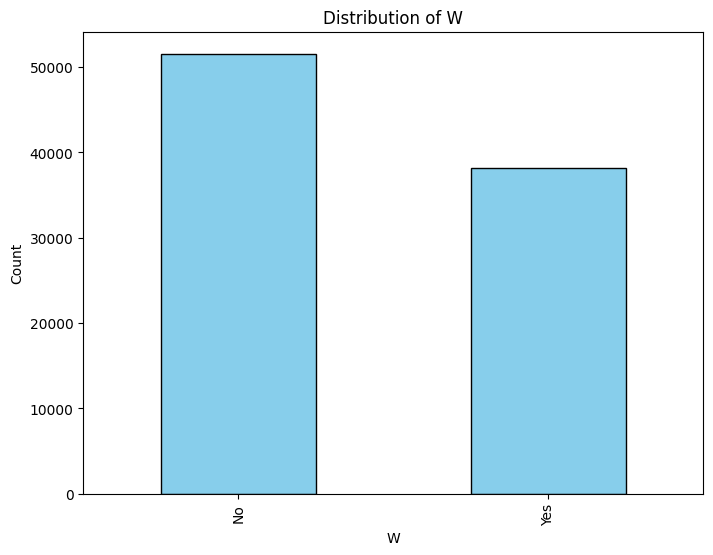

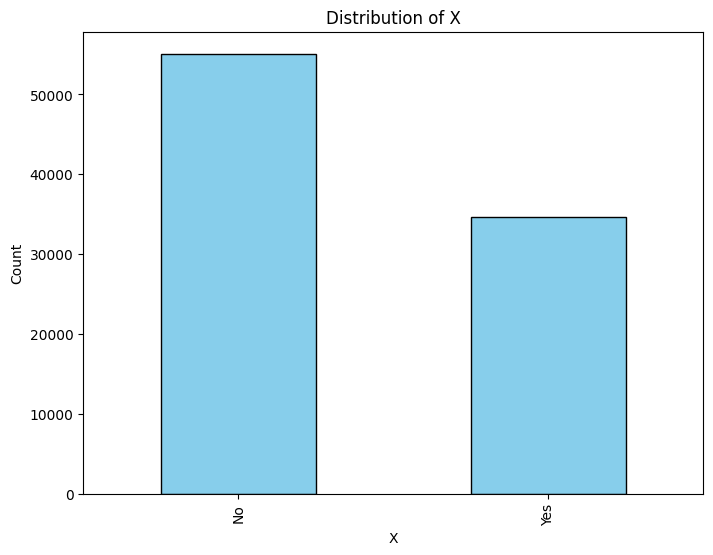

In [57]:
# EDA. Analysis of categorical features
# Assuming 'train_data' is your DataFrame containing the data

# Step 8: Identify categorical features
categorical_columns = train_data.select_dtypes(include=['object']).columns

print("Categorical features:")
print(categorical_columns)
# Step 9: Plot bar charts for each categorical feature
for column in categorical_columns:
    plt.figure(figsize=(8, 6))  # Optional: Set the size of the plot
    train_data[column].value_counts().plot(kind='bar', color='skyblue', edgecolor='black')
    plt.title(f"Distribution of {column}")
    plt.xlabel(column)
    plt.ylabel("Count")
    plt.show()